# Praca domowa nr 4

## Autor: Szymon Gut

# Część pierwsza pracy domowej

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [6]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Zapytanie pierwsze (a)

In [26]:
df.loc[(df.Year > 2015) & (df.Publisher == "Nintendo") & (df.NA_Sales < df.EU_Sales)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


### Zapytanie drugie (b)

In [16]:
df2 = df[df.Year == 2010].groupby("Genre").sum()
result = df2[df2.Global_Sales == max(df2.Global_Sales)].reset_index()
result

,Genre,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,1617111,454260.0,60.32,35.75,8.58,12.85,117.64


lub jeśli chcemy wyciągnąć samo Genre


In [17]:
result.iloc[0,0]

'Action'

### Zapytanie trzecie (c)

In [24]:
df2 = df.groupby("Genre")[["JP_Sales", "EU_Sales"]] \
.agg("mean").query("JP_Sales > EU_Sales") \
.reset_index()
df2 = df2.rename(columns = {"Genre":"Typ Gry", "JP_Sales":"Średnia Sprzedaż"}) \
.sort_values("Średnia Sprzedaż", ascending = False)
df2.drop('EU_Sales', axis = 'columns', inplace = True)
df2

,Typ Gry,Średnia Sprzedaż
1,Role-Playing,0.238293
0,Puzzle,0.099439
2,Strategy,0.073284


# Przejdźmy do drugiej części pracy domowej, to jest poprawienia wcześniejszej wizualizacji

Jako wykres do poprawienia wybrałem prace domową Wiktora Jakubowskiego. Wizualizacja, którą Wiktor poprawiał przedstawia wyniki sondażu na kogo chcą głosować Polacy. Jest to wykres kołowy, który jak wiemy ciężko jest odczytywać.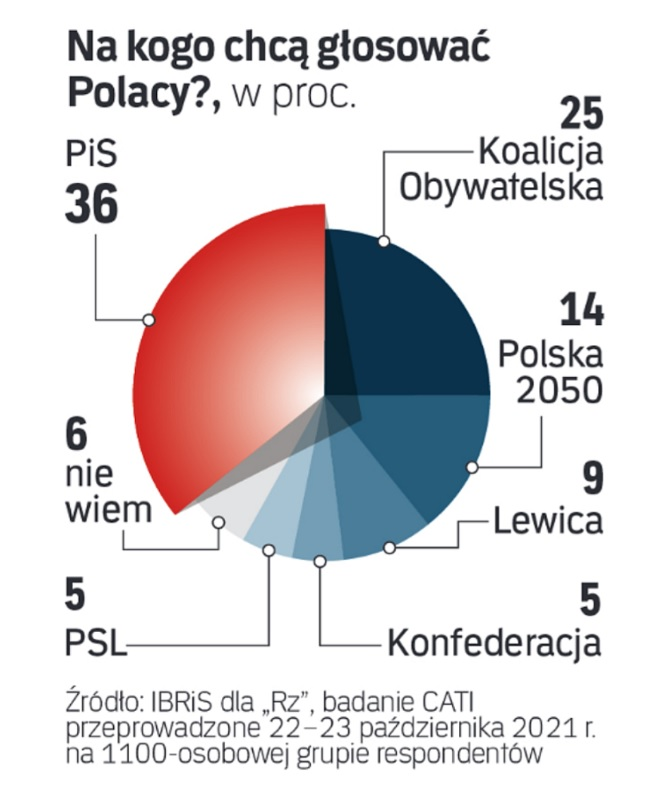

Wykres pochodzi z artykułu "Rzeczypospolitej" z dnia 24 pażdziernika 2021 roku. Wykres przedstawia procentowe poparcie dla poszczególnych partii politycznych w Polsce. Badanie zostało przeprowadzone metodą CATI na grupie 1100 osób w dniach 22 - 23 października 2021 roku.

# Poprawiona wersja Wiktora

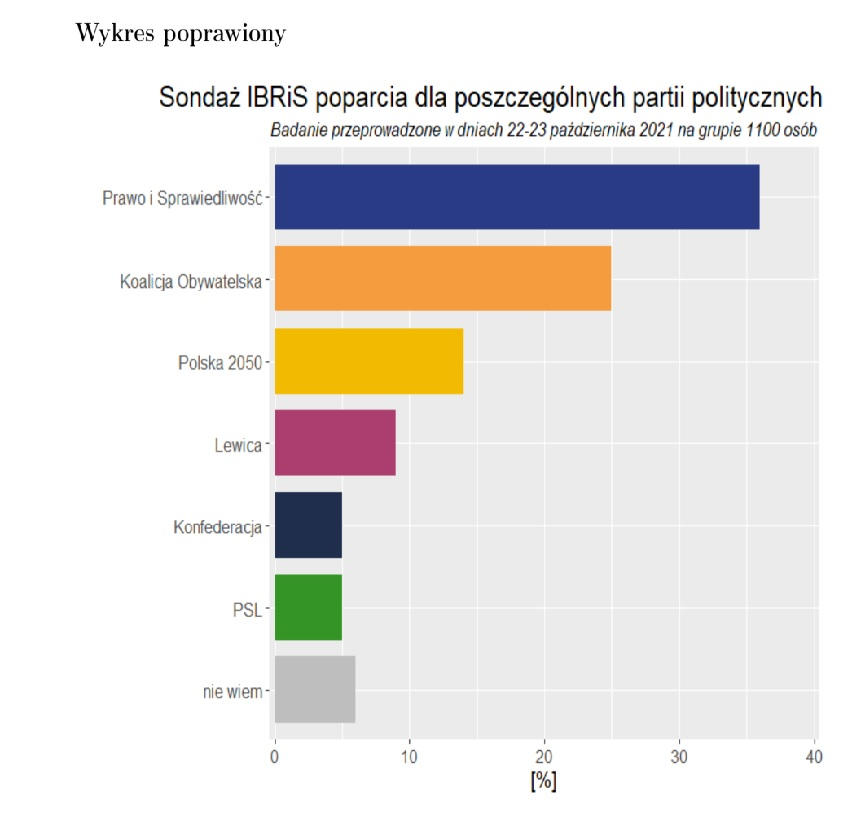

Link do pracy Wiktora: https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/JakubowskiWiktor/JakubowskiWiktor.pdf.
Moim zdaniem nie potrzebne są tu kolory(nic one nie wnoszą, więc w mojej wizualizacji ich nie dodam)

# Teraz przedstawienie mojej wizualizacji

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Stworzenie DataFrame potrzebnego do wizualizacji

In [44]:
data = {"Partie":["Prawo i Sprawiedliwość", "Koalicja Obywatelska", "Polska 2050", "Lewica", "Konfederacja", "PSL", "nie wiem"], "procent":[36,25,14,9,5,5,6]}
df = pd.DataFrame(data)

In [50]:
df

,Partie,procent
0,Prawo i Sprawiedliwość,36
1,Koalicja Obywatelska,25
2,Polska 2050,14
3,Lewica,9
4,Konfederacja,5
5,PSL,5
6,nie wiem,6


In [51]:
sns.set(rc = {'figure.figsize': (12,7)})
sns.set_style("darkgrid")
pd.options.display.max_rows = 10
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)

##### Funkcja pomocnicza

In [99]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() *  1/2
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

Powyższa funkcja to funkcja generująca wartości liczbowe przy słupkach.

* h_v - okresla czy barplot jest poziomy czy pionowy.

* "h" reprezentuje poziomy wykres słupkowy 

* "v" reprezentuje pionowy wykres słupkowy

* space - przestrzeń pomiedzy tekstem a górnym rogiem słupka(działa tylko gdy wykres jest poziomy)

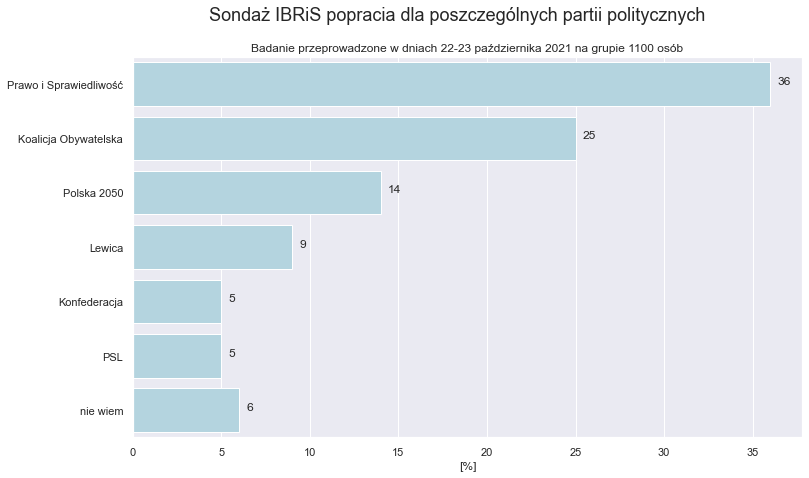

In [100]:
plot = sns.barplot(data=df, x="procent", y="Partie", color="lightblue")
plt.title("Badanie przeprowadzone w dniach 22-23 października 2021 na grupie 1100 osób", fontsize = 12)
plt.suptitle("Sondaż IBRiS popracia dla poszczególnych partii politycznych", fontsize = 18)
plt.xlabel("[%]")
plt.ylabel(None)
show_values_on_bars(plot, "h", 0.4)
plt.show()


# Czemu wykres jest lepszy od pozostałych?

Tak prezentuje się mój poprawiony wykres. Zmieniłem kilka kolorów w tym wykresie na jeden, gdyż w tym przypadku paleta barw nic nie wnosiła, a tylko rozpraszała wzrok. Dodatkowo dodałem wartości liczbowe przy słupkach, gdyż zdecydowanie łatwiej wtedy odczytać dokładną wartość słupka. Przez te dwa działania, moim zdaniem wykres stał się jeszcze bardziej czytelny i łatwiej odczytywać z niego wartości